# 1).Problem Statement

The primary objective of this data science project is to construct a predictive model capable of forecasting the sales of individual products at specific stores. The model's predictions will offer valuable insights into the properties of products and stores that significantly influence sales.

Specific Goals:
Sales Prediction:

Develop a robust predictive model to estimate the sales of each product at a particular store.
Evaluate the model's accuracy and reliability through appropriate metrics.

Understanding Key Drivers:

Identify and analyze the key attributes of both products and stores that play a pivotal role in influencing sales.
Gain insights into the factors contributing most to variations in sales figures.

Handling Missing Data:

Address technical glitches that have resulted in missing values in the dataset from certain stores.
Implement strategies for treating missing values to ensure the model's accuracy.

Expected Deliverables:
Predictive Model: A well-constructed predictive model that accurately estimates product sales.
Model performance metrics and evaluation results.



# 2).Hypothesis Generation

Here are some potential hypotheses for the BigMart sales prediction project:

Product Size Hypothesis:

Hypothesis: Larger-sized products may have higher sales due to increased demand.
Rationale: Consumers might prefer bulk purchases or larger sizes for certain products, leading to higher sales.
Store Location Hypothesis:

Hypothesis: Stores located in urban areas may experience higher sales compared to stores in rural areas.
Rationale: Urban areas generally have a larger population and higher footfall, potentially resulting in increased sales.
<br><br>

Product Visibility Hypothesis:

Hypothesis: Products placed at eye level or in prominent store locations may have higher sales.
Rationale: Visibility within the store is a key factor influencing consumer purchasing decisions.

Product Category Hypothesis:

Hypothesis: Certain product categories (e.g., electronics, groceries) may have different sales patterns.
Rationale: Different product categories may exhibit distinct consumer behavior and sales dynamics.

Store Size Hypothesis:

Hypothesis: Larger stores may have higher sales due to a wider product assortment.
Rationale: Larger stores can offer a more extensive range of products, attracting a diverse customer base.

Store Location Hypothesis:

Hypothesis: The store's geographical location significantly influences its success metrics.
Rationale: The hypothesis is based on the assumption that factors such as accessibility, surrounding demographics, and local competition can play a crucial role in determining a store's performance.

Product Price Sensitivity Hypothesis:

Hypothesis: Price-sensitive products may experience higher sales elasticity.
Rationale: Consumers may be more responsive to changes in prices for certain products.


# 3).Loading Packages and Data

In [4]:
# Import necessary libraries
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error


# Set the absolute paths to your training and testing datasets
train_dataset_path = 'C:/Users/nouha mn/BigMart-Analysis-and-Prediction-on-Sales-Data/Train.csv'
test_dataset_path = 'C:/Users/nouha mn/BigMart-Analysis-and-Prediction-on-Sales-Data/Test.csv'

# Load training and testing data
train_data = pd.read_csv(train_dataset_path)
test_data = pd.read_csv(test_dataset_path)


# 4).Data Structure and Content

In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print("Train: ",train_data.info())
print("Test: ",test_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Train:  None
<class 'pandas.cor

In [6]:
# Display the first few rows of the Train dataset
print("\nFirst Few Rows of the Train Dataset:")
train_data.head()


First Few Rows of the Train Dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Display the first few rows of the Train dataset
print("\nFirst Few Rows of the Test Dataset:")
test_data.head()


First Few Rows of the Test Dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:

# Check for missing values
print("\nMissing Values for the Train Dataset:")
print(train_data.isnull().sum())



Missing Values for the Train Dataset:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [9]:

# Check for missing values
print("\nMissing Values for the Test Dataset:")
print(test_data.isnull().sum())



Missing Values for the Test Dataset:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


# 5)Exploratory Data Analysis 

In [10]:
# impute missing values in Item_Weight and Outlet_Size  in train  set
median_Item_Weight = train_data['Item_Weight'].median()
train_data['Item_Weight'].fillna(median_Item_Weight, inplace=True)
mode_value = train_data['Outlet_Size'].mode()[0]
#train_data['Outlet_Size'].fillna(, inplace=True)
train_data['Outlet_Size'].fillna(mode_value, inplace=True)

# Drop missing values in Train Dataset
#train_data=train_data.dropna()
# Check missing values
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# Replace 'LF' with 'Low Fat'
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
# Replace 'reg' with 'Regular'
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')


In [12]:
print("\nTrain Dataset shape: ")
print(train_data.shape)
print("Number Of Dupliactes in the Train Dataset:", train_data.duplicated().sum())


Train Dataset shape: 
(8523, 12)
Number Of Dupliactes in the Train Dataset: 0


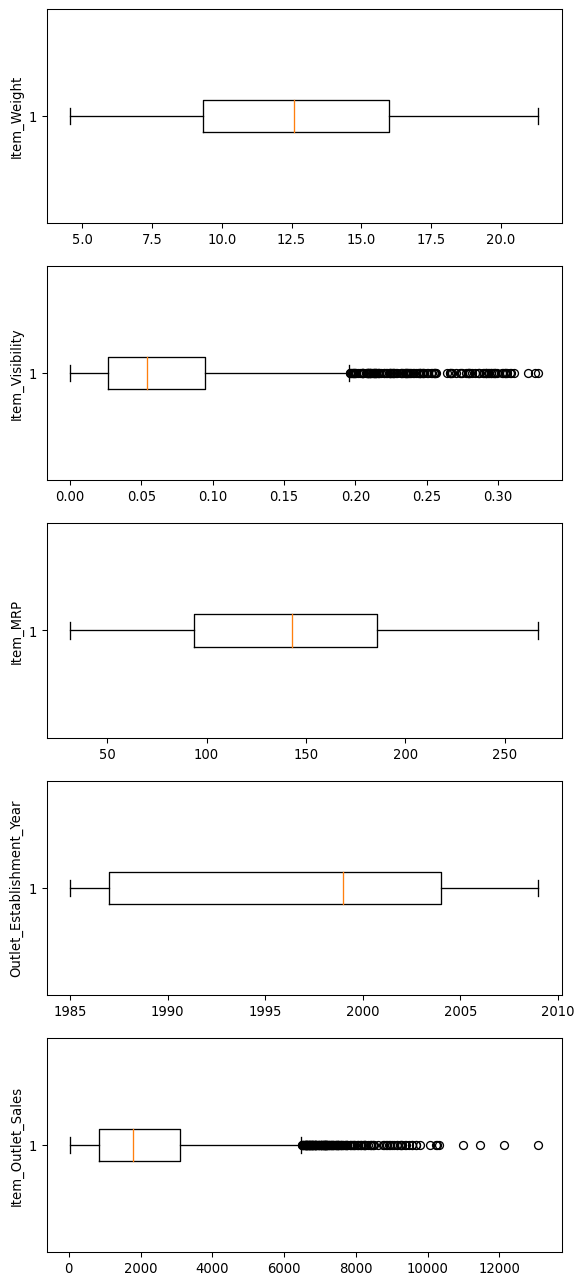

In [13]:
numerical_columns = train_data.select_dtypes(include='number').columns

# Box plot for outlier detection 
fig, axs = plt.subplots(len(numerical_columns),1,dpi=95, figsize=(7,17))
i = 0
for col in train_data[numerical_columns]:
    axs[i].boxplot(train_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

<Axes: >

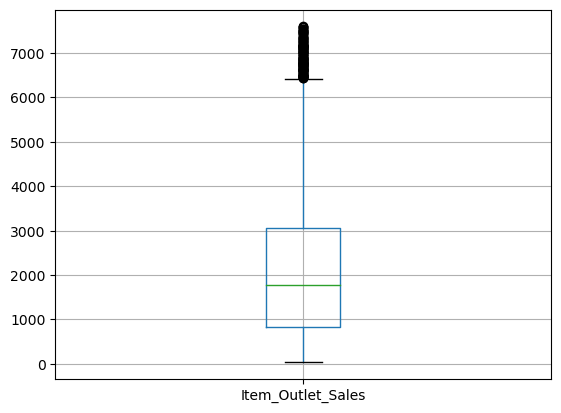

In [14]:
# Remove outliers for Item_Outlet_Sales (example using IQR method)
Q1 = train_data['Item_Outlet_Sales'].quantile(0.25)
Q3 = train_data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[(train_data['Item_Outlet_Sales'] >= Q1 - 2 * IQR) & (train_data['Item_Outlet_Sales'] <= Q3 + 2 * IQR)]

train_data.boxplot(column=['Item_Outlet_Sales'])



<Axes: >

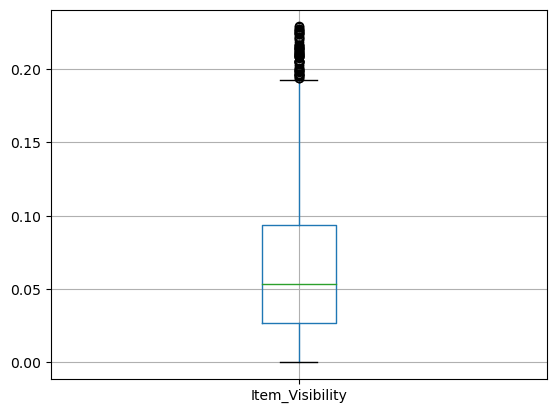

In [15]:
# Remove outliers for Item_Visibility (example using IQR method)
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[(train_data['Item_Visibility'] >= Q1 - 2 * IQR) & (train_data['Item_Visibility'] <= Q3 + 2 * IQR)]
train_data.boxplot(column=['Item_Visibility'])

In [16]:
# Display summary statistics for numerical features
print("\nSummary Statistics of the Train Dataset:")
train_data.describe()


Summary Statistics of the Train Dataset:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000
mean,12.818400,0.064228,140.306369,1997.966567,2146.013715
std,4.248626,0.047764,61.992395,8.327749,1602.969881
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026889,93.462000,1987.000000,852.224000
50%,12.600000,0.053393,142.083800,1999.000000,1797.660000
75%,16.100000,0.093459,185.060800,2004.000000,3081.988200
max,21.350000,0.228993,266.888400,2009.000000,7602.104400


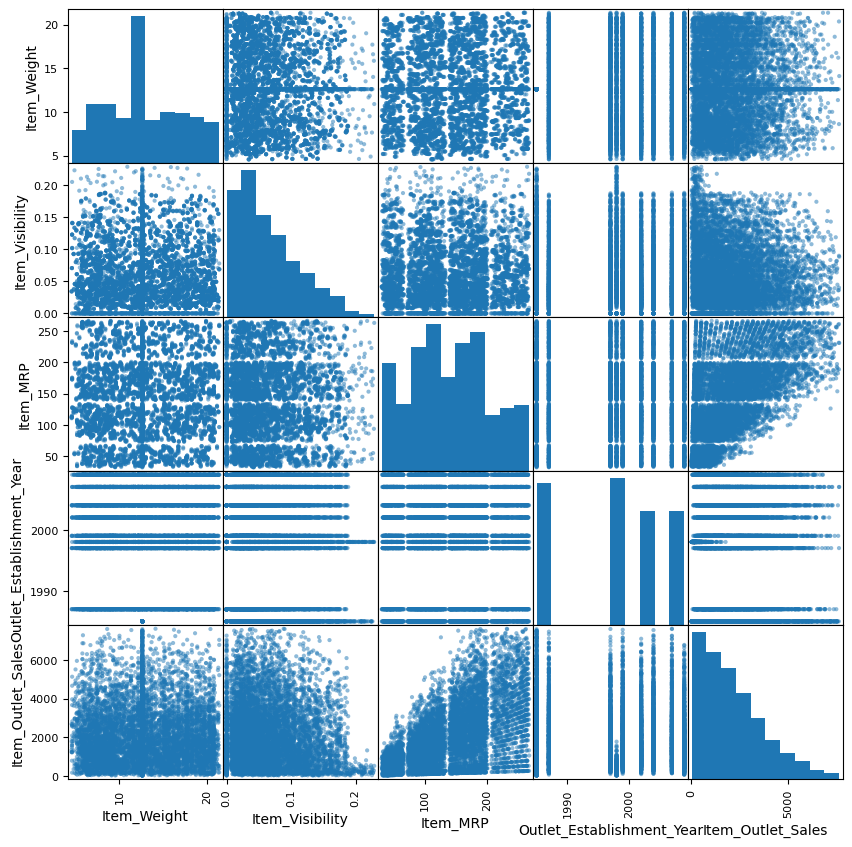

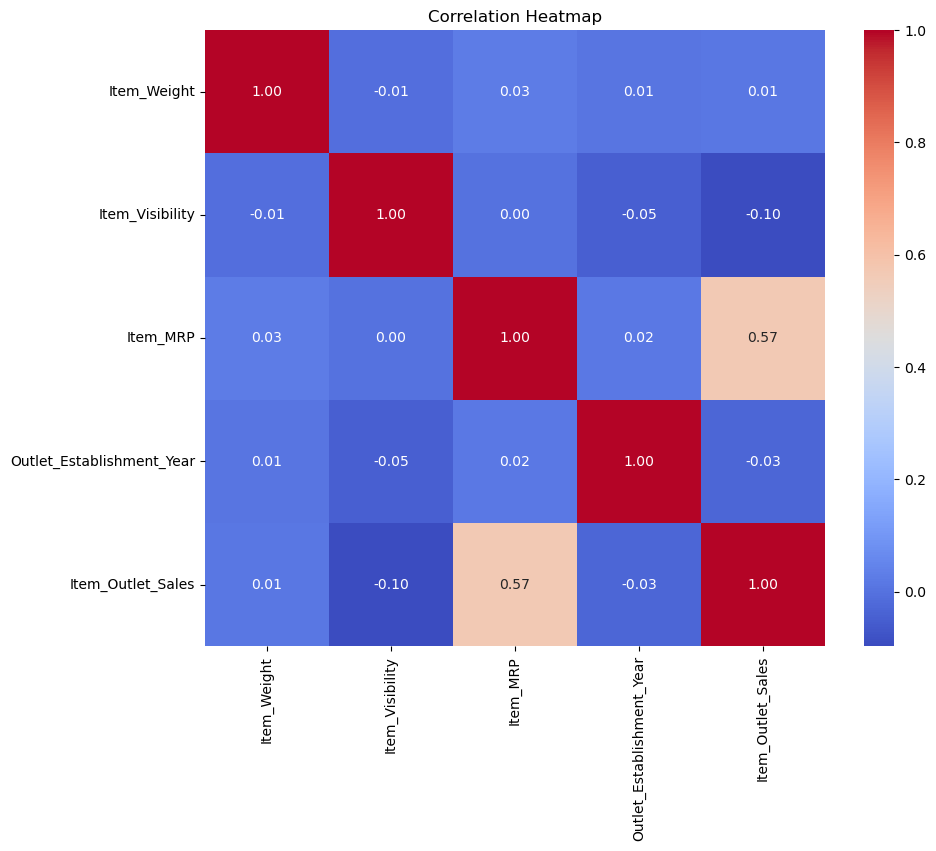

In [17]:

# Scatter matrix for an overview of relationships between numerical features
scatter_matrix(train_data, figsize=(10, 10))
plt.show()

# Exclude non-numeric columns from the correlation matrix
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


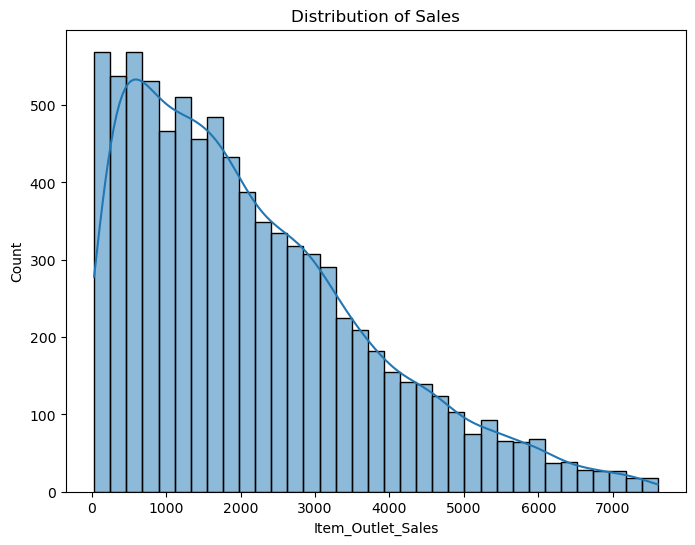

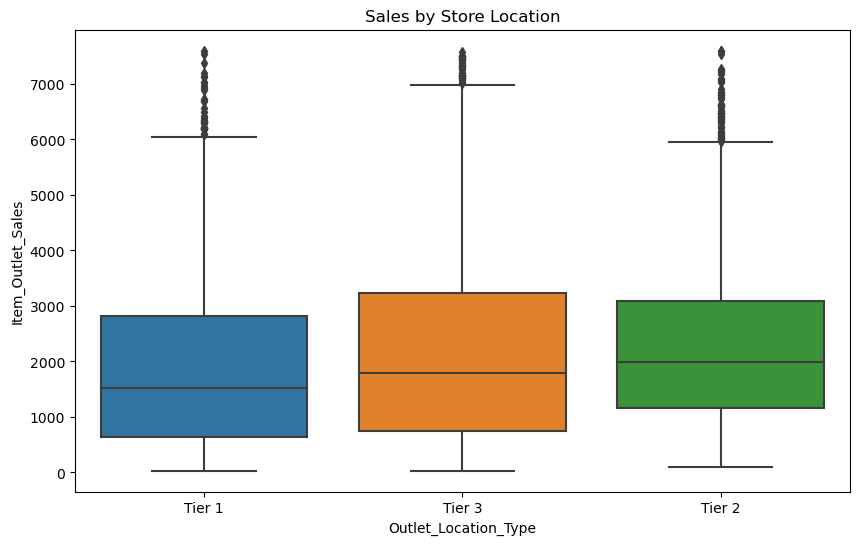

In [18]:
# Example: Histogram of Sales
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Example: Box plot for Sales by Store Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales by Store Location')
plt.show()

# 6).Encoding Categorical Variables

In [19]:

# Separate the target variable (Y) and features (X)
Y = train_data['Item_Outlet_Sales']
X = train_data.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'])


In [20]:
#Label Encoding
label_encoder = LabelEncoder()
X['Outlet_Size'] = label_encoder.fit_transform(X['Outlet_Size'])
X['Item_Fat_Content'] = label_encoder.fit_transform(X['Item_Fat_Content'])


In [21]:
print("\nX (Features):")
X.head()


X (Features):


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,Dairy,249.8092,1,Tier 1,Supermarket Type1
1,5.92,1,0.019278,Soft Drinks,48.2692,1,Tier 3,Supermarket Type2
2,17.50,0,0.016760,Meat,141.6180,1,Tier 1,Supermarket Type1
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,Tier 3,Grocery Store
4,8.93,0,0.000000,Household,53.8614,0,Tier 3,Supermarket Type1


In [22]:

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first', sparse_output=False), ['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),
    ],    
    remainder='passthrough'  # This will keep non-categorical columns as they are

)

# Fit and transform the training data
X_transformed = preprocessor.fit_transform(X)


In [23]:
print(X_transformed.shape)

(8375, 25)


In [24]:
#Standard Scaling
# Assuming 'X_train' is your training data
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)
#Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))


In [25]:
X_transformed_scaled.shape

(8375, 25)

# 7).Seperating Training And Test Data

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_scaled, Y, test_size=0.2, random_state=42)

# 8).Running The Models

## Linear Regression

In [27]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1088505.2193046622
R-squared: 0.5721483893143139


## Regularized Linear Regression

In [28]:
# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_ridge)
print(f'R-squared Ridge Regression : {r2}')
# Calculate R-squared
r2 = r2_score(y_test, y_pred_lasso)
print(f'R-squared Lasso Regression : {r2}')

Ridge Regression Mean Squared Error: 1088510.6386665865
Lasso Regression Mean Squared Error: 1088546.5400011938
R-squared Ridge Regression : 0.5721462591612498
R-squared Lasso Regression : 0.5721321476590125


## RandomForest

In [29]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

Random Forest Mean Squared Error: 1175767.229023805
R-squared: 0.5378488832137782


## XGBoost

In [30]:

# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
# Display the R-squared score
print(f'R-squared (R2) Score: {r2}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Mean Squared Error on Test Set: 1021798.2536170464
R-squared (R2) Score: 0.5983684590091869


In [31]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_gbr_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_gbr_model.predict(X_test)

# Calculate mean squared error (MSE) with the best model
mse_best = mean_squared_error(y_test, y_pred_best)

# Display the mean squared error with the best model
print(f'Gradient Boosting Regressor Model Mean Squared Error: {mse_best}')

# Calculate R-squared (R2) score with the best model
r2_best = r2_score(y_test, y_pred_best)

# Display the R-squared score with the best model
print(f'Gradient Boosting Regressor Model R-squared (R2) Score: {r2_best}')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Regressor Model Mean Squared Error: 1028285.1520718987
Gradient Boosting Regressor Model R-squared (R2) Score: 0.5958186963594165


# 8). Final Predictions On The Test Dataset

In [32]:
# impute missing values in Item_Weight and Outlet_Size  in  test set
median_Item_Weight = test_data['Item_Weight'].median()
test_data['Item_Weight'].fillna(median_Item_Weight, inplace=True)

mode_value = test_data['Outlet_Size'].mode()[0]
#test_data['Outlet_Size'].fillna(, inplace=True)
test_data['Outlet_Size'].fillna(mode_value, inplace=True)# Drop missing values in Test Dataset
#test_data=test_data.dropna()
# Check missing values
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [33]:
# Replace 'LF' with 'Low Fat'
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
# Replace 'reg' with 'Regular'
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')


In [34]:
print("\nTest Dataset shape: ")
print(test_data.shape)
print("Number Of Dupliactes in the Test Dataset:", test_data.duplicated().sum())


Test Dataset shape: 
(5681, 11)
Number Of Dupliactes in the Test Dataset: 0


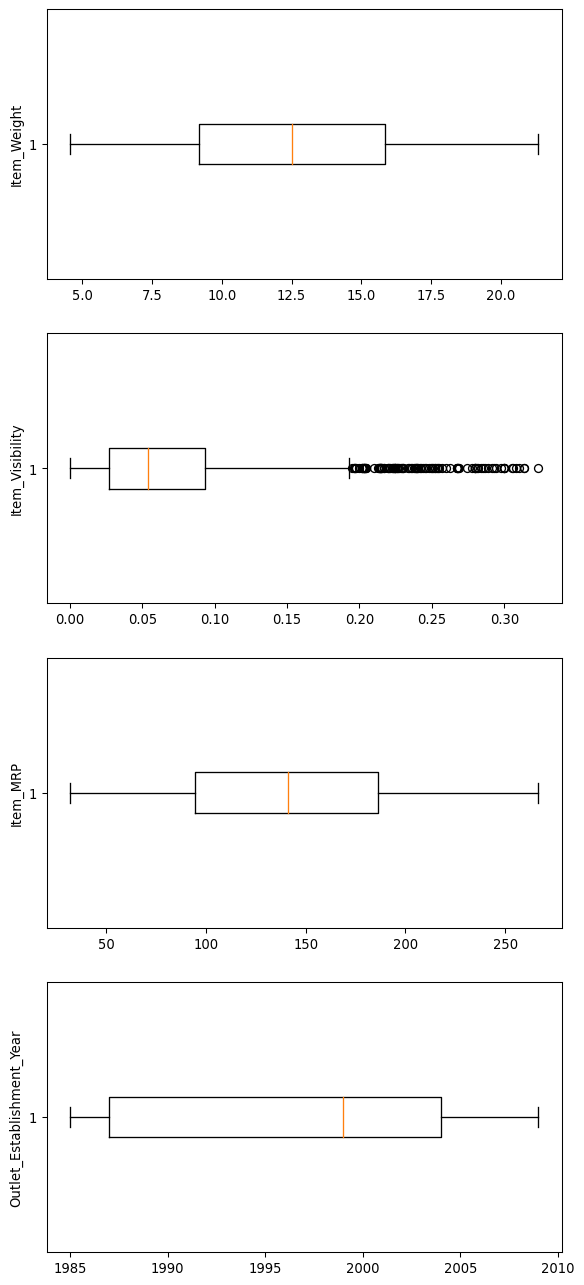

In [35]:
numerical_columns = test_data.select_dtypes(include='number').columns
# Box plot for outlier detection 
fig, axs = plt.subplots(len(numerical_columns),1,dpi=95, figsize=(7,17))
i = 0
for col in test_data[numerical_columns]:
    axs[i].boxplot(test_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

<Axes: >

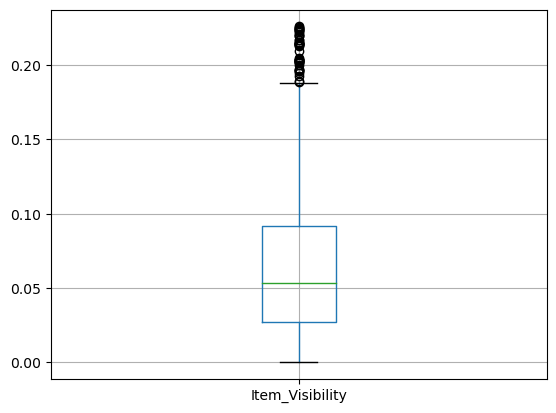

In [36]:
# Remove outliers for Item_Visibility (example using IQR method)
Q1 = test_data['Item_Visibility'].quantile(0.25)
Q3 = test_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
test_data = test_data[(test_data['Item_Visibility'] >= Q1 - 2 * IQR) & (test_data['Item_Visibility'] <= Q3 + 2 * IQR)]

test_data.boxplot(column=['Item_Visibility'])

In [37]:
test_data = test_data.drop(columns=[ 'Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'])

test_data['Outlet_Size'] = label_encoder.fit_transform(test_data['Outlet_Size'])
test_data['Item_Fat_Content'] = label_encoder.fit_transform(test_data['Item_Fat_Content'])
test_data.head()

# Fit and transform the training data
test_data_transformed = preprocessor.fit_transform(test_data)
test_data_transformed_scaled = scaler.fit_transform(test_data_transformed)

In [38]:
y_pred = best_gbr_model.predict(test_data_transformed_scaled)
print(y_pred)

[1602.77728307 1352.21347516 1251.31488124 ... 1932.39983549 3699.08536863
 1366.06570365]


# 10). Saving The Final Model

In [39]:
# Save the trained model to a file using pickle
model_filename = 'gbr_model.pkl'
pickle.dump(best_gbr_model, open(model_filename, 'wb'))